Preventing customer churn is vital for all businesses. The cost of acquiring new customers is often higher than retaining existing customers.Reducing customer churn not only prevents loss of revenue, but also increases customer loyalty and satisfaction. In addition, high customer churn rates can damage a company's brand image and reduce its competitiveness. Therefore, effectively predicting and preventing customer churn is critical to the profitability and sustainability of companies.

In this notebook, three different machine learning algorithms are used to predict customer churn by working with a telecommunication company dataset: Logistic regression, Random forest algorithm and support vector machines (SVM).Customer churn was predicted with these selected algorithms and a comparison was made between the algorithms.As a result of machine learning, the random forest algorithm was selected as the best prediction algorithm with an accuracy of 81%. After this study, the company is expected to foresee which customers will unsubscribe and carry out a study for them. Thus, it approaches the goal of protecting and increasing brand value by minimising customer loss.

**customerID** : Customer ID  
**gender** : Whether the customer is a male or a female  
**SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)  
**Partner** : Whether the customer has a partner or not (Yes, No)  
**Dependents** : Whether the customer has dependents or not (Yes, No)  
**tenure** : Number of months the customer has stayed with the company  
**PhoneService** : Whether the customer has a phone service or not (Yes, No)  
**MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)  
**InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)  
**OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)  
**OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)  
**DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)  
**TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)  
**StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)  
**StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)  
**Contract** : The contract term of the customer (Month-to-month, One year, Two year)  
**PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)  
**PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))  
**MonthlyCharges** : The amount charged to the customer monthly  
**TotalCharges** : The total amount charged to the customer  
**Churn** : Whether the customer churned or not (Yes or No)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.Churn.value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
categorical = df.select_dtypes(include='object').drop('Churn', axis=1).columns.tolist()
numerical = df.select_dtypes(exclude='object').columns.tolist()

In [10]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(value=0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(value=0)

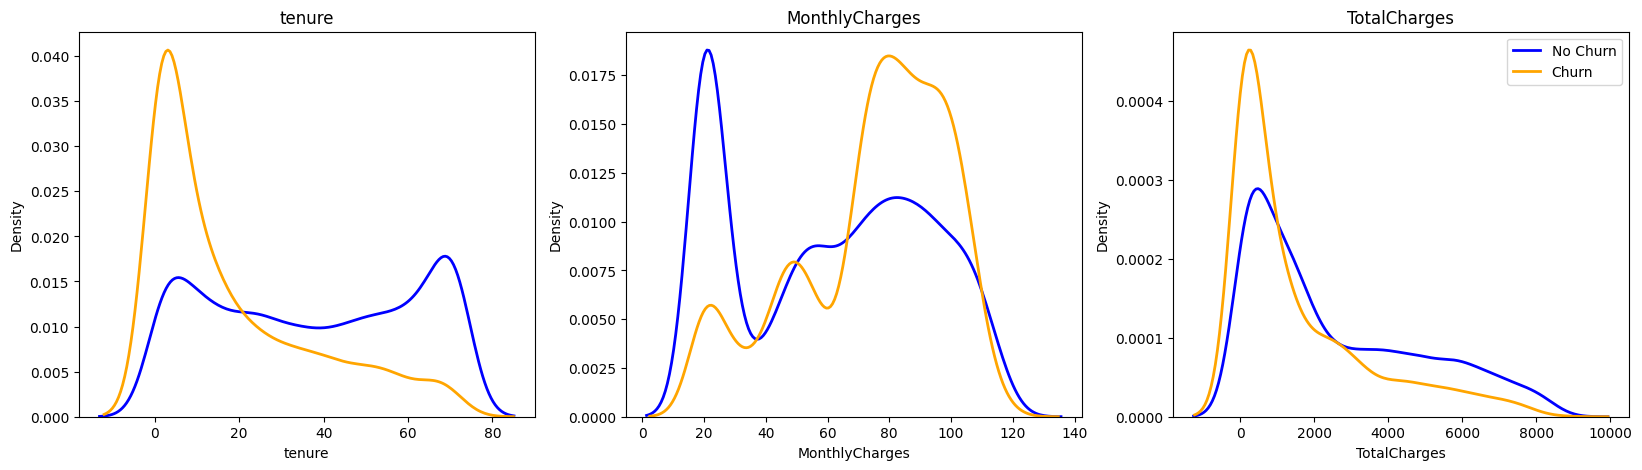

In [11]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(20, 5)) 
for i, c in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df[df['Churn'] == 'No'][c], color='blue', linewidth=2, label='No Churn')
    sns.kdeplot(df[df['Churn'] == 'Yes'][c], color='orange', linewidth=2, label='Churn')
    plt.title(c)
plt.legend()
plt.show()

In [12]:
df.drop('customerID', axis=1, inplace=True)

<Axes: xlabel='tenure', ylabel='Churn'>

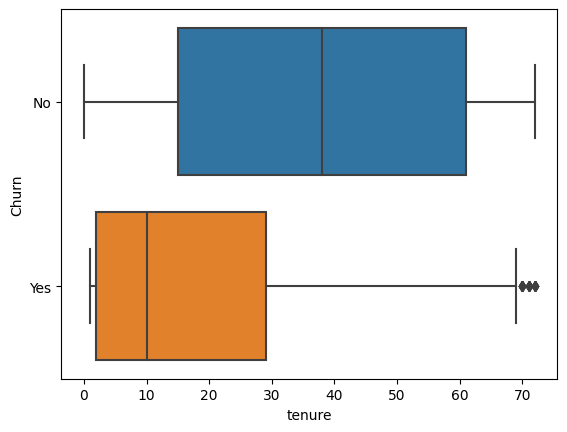

In [13]:
sns.boxplot(x=df['tenure'],y=df['Churn'])

<Axes: xlabel='TotalCharges', ylabel='Churn'>

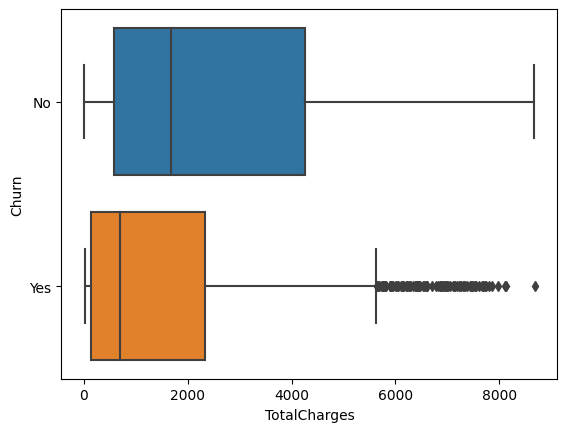

In [14]:
sns.boxplot(x=df['TotalCharges'],y=df['Churn'])

In [15]:
from sklearn.preprocessing import LabelEncoder
df_encoder=df.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
df_encoder.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [16]:
churn_yes=df_encoder.loc[df_encoder['Churn'].abs()>0]

In [17]:
Q1_total_charges = churn_yes['TotalCharges'].quantile(1/4)
Q3_total_charges = churn_yes['TotalCharges'].quantile(3/4)
IQR = Q3_total_charges - Q1_total_charges
IQR

2196.8

In [18]:
Q=Q3_total_charges+(1.5*IQR)
Q

5626.5

In [19]:
df_encoder_churn_output = df_encoder[~((df_encoder['TotalCharges'] < (Q3_total_charges + 1.5 * IQR)))&(df_encoder['Churn']>0)]
df_encoder_churn_output.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
104,1,0,1,0,68,1,2,1,0,2,2,2,2,2,2,1,0,110.00,7611.85,1
339,1,0,1,0,63,1,2,1,0,2,2,0,2,2,0,1,2,103.40,6603.00,1
402,1,0,1,1,69,1,2,1,0,0,2,0,2,2,0,1,1,99.45,7007.60,1
445,0,0,0,0,60,1,2,1,0,2,2,0,2,2,0,1,2,105.90,6396.45,1
609,0,1,1,0,65,1,2,1,2,0,2,0,2,2,0,0,0,105.25,6786.40,1


In [20]:
df_encoder.drop(df_encoder[~((df_encoder['TotalCharges'] < (Q3_total_charges + 1.5 * IQR)))&(df_encoder['Churn']>0)].index, inplace=True)
df_encoder.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [21]:
x=df_encoder.drop('Churn',axis=1)
y=df_encoder['Churn']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 400)

# Algorithms

In [22]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
classification=classification_report(y_test, y_pred,digits=4)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Classification Score:", classification)

Accuracy Score: 0.8067772170151406
Precision Score: 0.6546052631578947
Recall Score: 0.5497237569060773
F1 Score: 0.5975975975975976
Classification Score:               precision    recall  f1-score   support

           0     0.8495    0.8976    0.8729      1025
           1     0.6546    0.5497    0.5976       362

    accuracy                         0.8068      1387
   macro avg     0.7520    0.7236    0.7352      1387
weighted avg     0.7986    0.8068    0.8010      1387



In [24]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred)
print('Confusion matrix\n\n',cm1)

Confusion matrix

 [[920 105]
 [163 199]]


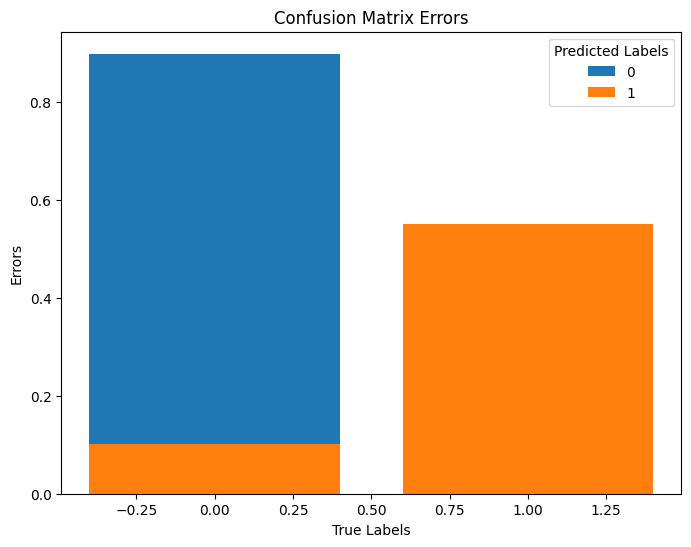

In [25]:
classes = np.unique(y_test)
errors = cm1 / cm1.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))

for i in range(len(classes)):
    plt.bar(classes, errors[:, i], label=classes[i])

plt.xlabel('True Labels')
plt.ylabel('Errors')
plt.title('Confusion Matrix Errors')
plt.legend(title='Predicted Labels')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rf_model = RandomForestClassifier(random_state=46).fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
accuracy_score(y_pred, y_test)

0.8125450612833454

In [27]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[942  83]
 [177 185]]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1025
           1       0.69      0.51      0.59       362

    accuracy                           0.81      1387
   macro avg       0.77      0.72      0.73      1387
weighted avg       0.80      0.81      0.80      1387



In [29]:
rf=RandomForestClassifier()
model15=rf.fit(x_train, y_train)
print("train accuracy:",model15.score(x_train, y_train),"\n","test accuracy:",model15.score(x_test,y_test))

train accuracy: 0.9981972237245358 
 test accuracy: 0.8082191780821918


In [30]:
x_train_df = pd.DataFrame(x_train,columns=x.columns)

Text(0, 0.5, 'Features')

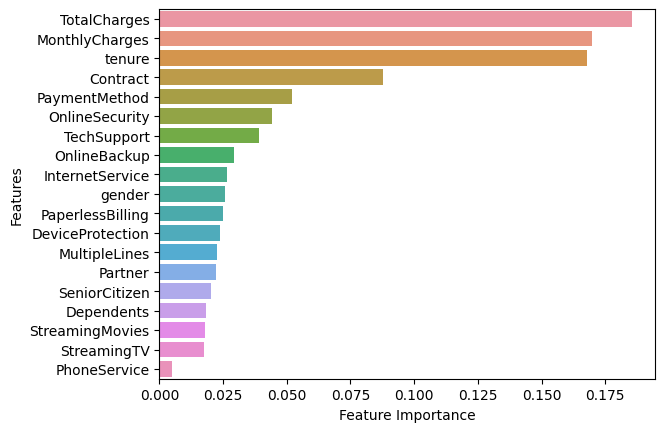

In [31]:
feature_scores=pd.Series(rf_model.feature_importances_,index=x_train_df.columns).sort_values(ascending=False)
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')

In [32]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1025
           1       0.68      0.49      0.57       362

    accuracy                           0.81      1387
   macro avg       0.76      0.71      0.72      1387
weighted avg       0.80      0.81      0.80      1387

[[942  83]
 [184 178]]


In [33]:
svm = SVC(kernel='linear')  # 'linear', 'poly', 'rbf', 'sigmoid' are options
svm.fit(x_train, y_train)
from sklearn.metrics import accuracy_score


y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm3 = confusion_matrix(y_test,y_pred)
print('Confusion matrix\n\n',cm3)
print("Accuracy:", accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits=4))

Confusion matrix

 [[919 106]
 [175 187]]
Accuracy: 0.7974044700793078
              precision    recall  f1-score   support

           0     0.8400    0.8966    0.8674      1025
           1     0.6382    0.5166    0.5710       362

    accuracy                         0.7974      1387
   macro avg     0.7391    0.7066    0.7192      1387
weighted avg     0.7874    0.7974    0.7900      1387



In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True)

grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [35]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.8135905246996321


In [36]:
grid_predictions = grid.predict(x_test) 

print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1025
           1       0.65      0.53      0.58       362

    accuracy                           0.80      1387
   macro avg       0.75      0.71      0.73      1387
weighted avg       0.79      0.80      0.80      1387

[[924 101]
 [171 191]]


Logistic Regression: ROC AUC=0.894
Random Forest: ROC AUC=0.885
Support Vector Machine: ROC AUC=0.893


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

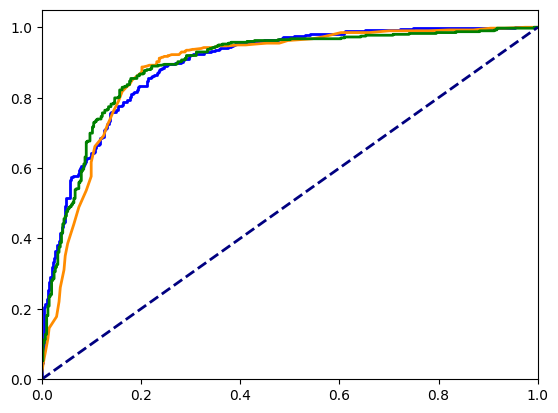

In [37]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.80, random_state=42)

lr_pred = [0 for _ in range(len(testy))]
rf_pred = [0 for _ in range(len(testy))]
svm_pred = [0 for _ in range(len(testy))]

rf = RandomForestClassifier()
lr = LogisticRegression()
svm = SVC(probability=True)

model = lr
model.fit(trainx, trainy)
model2 = rf
model2.fit(trainx, trainy)
model3 = svm
model3.fit(trainx, trainy)

lr_pred = model.predict_proba(testx)[:, 1]
rf_pred = model2.predict_proba(testx)[:, 1]
svm_pred = model3.predict_proba(testx)[:, 1]

lr_auc = roc_auc_score(testy, lr_pred)
rf_auc = roc_auc_score(testy, rf_pred)
svm_auc = roc_auc_score(testy, svm_pred)

print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
print('Support Vector Machine: ROC AUC=%.3f' % (svm_auc))

lr_fpr, lr_tpr, _ = roc_curve(testy, lr_pred)
rf_fpr, rf_tpr, _ = roc_curve(testy, rf_pred)
svm_fpr, svm_tpr, _ = roc_curve(testy, svm_pred)

plt.figure()
plt.plot(lr_fpr, lr_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {lr_auc:.3f})')
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label=f'SVM (AUC = {svm_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel

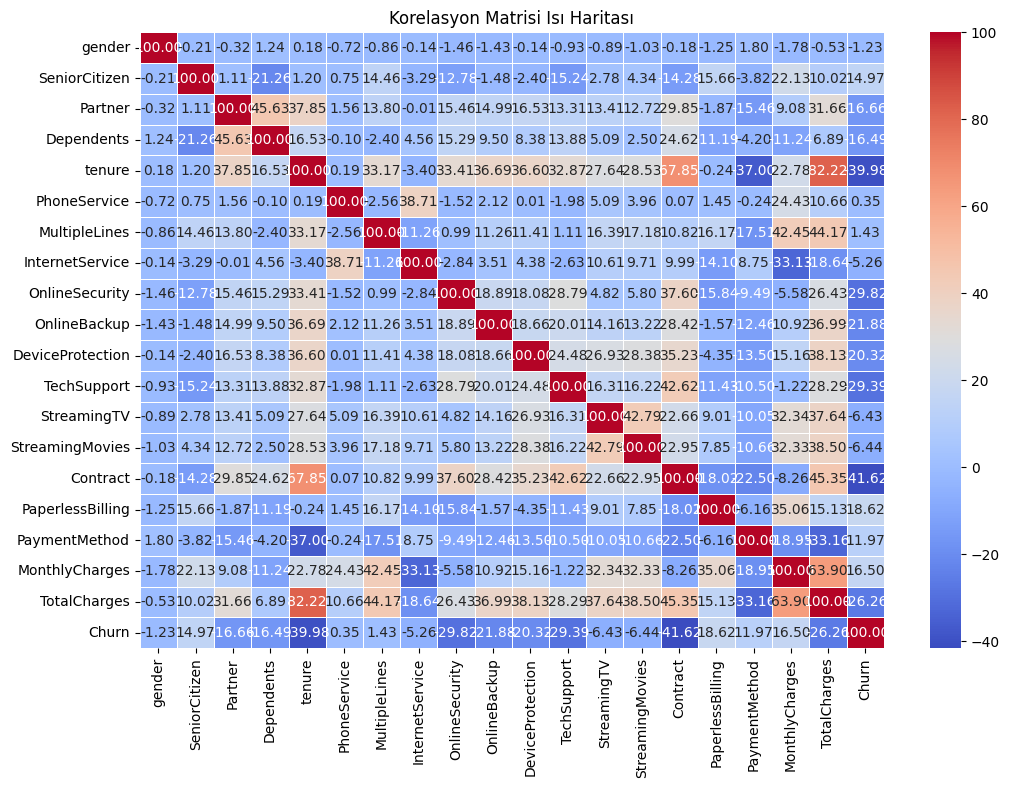

In [38]:
correlation_matrix = df_encoder.corr()*100
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi Isı Haritası')
plt.show()

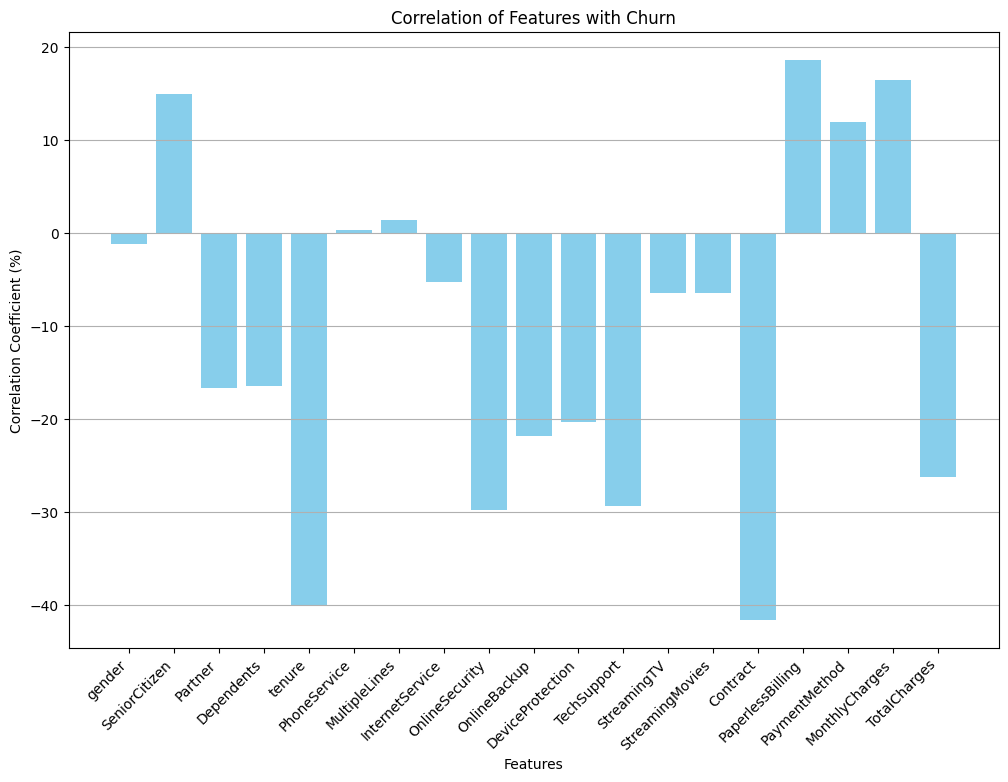

In [39]:
churn_corr = correlation_matrix['Churn']
plt.figure(figsize=(12, 8))
plt.bar(df_encoder.columns[:-1], churn_corr.drop('Churn').values, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient (%)')
plt.title('Correlation of Features with Churn')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()